In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
t_facture = pd.read_csv('Table_facture.csv')
t_produit = pd.read_csv('Table_point_de_vente.csv')
t_vente = pd.read_csv('Table_produit.csv')

In [3]:
t_facture.head()


,Numero_Facture,Date_vente,Numero_produit_vendu,Qte_vendu,Numero_point_vente
0,1111158703213,1970-04-09,3531693444,5.0,25004265
1,1111197368497,1981-01-27,2894887538,5.0,60005193
2,1111152299750,1981-01-12,126626962,4.0,21023597
3,1111131219182,1993-06-29,1409350109,2.0,21023597
4,1111169336424,2016-03-28,4047585339,1.0,16615180


In [4]:
t_facture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numero_Facture        25000 non-null  int64  
 1   Date_vente            25000 non-null  object 
 2   Numero_produit_vendu  25000 non-null  int64  
 3   Qte_vendu             24960 non-null  float64
 4   Numero_point_vente    25000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 879.0+ KB


In [5]:
t_produit.head()

,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,Température_hiver,Condition_été,Température_été,Bord_de_mer,Latitude,Longitude
0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
1,12362221,Canada,Québec,Québec,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Non,46.820634,-71.232010
2,21023597,Canada,Québec,Gaspésie,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Oui,48.830100,-64.481800
3,48874568,Canada,Colombie-Britanique,Vancouver,Océanique,Très_peu,Moyen_froid,Humide,Doux,Oui,45.638728,-122.661486
4,60005193,United States,New-York,New-York,Subtropical Humide,Peu,Moyen_froid,Normal,Chaud,Non,40.712784,-74.005941


In [6]:
t_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Numero_point_de_vente  8 non-null      int64  
 1   Pays                   8 non-null      object 
 2   Province_Etat          8 non-null      object 
 3   Ville                  8 non-null      object 
 4   Climat                 8 non-null      object 
 5   Neige_hiver            8 non-null      object 
 6   Température_hiver      8 non-null      object 
 7   Condition_été          8 non-null      object 
 8   Température_été        8 non-null      object 
 9   Bord_de_mer            8 non-null      object 
 10  Latitude               8 non-null      float64
 11  Longitude              8 non-null      float64
dtypes: float64(2), int64(1), object(9)
memory usage: 544.0+ bytes


In [7]:
t_vente.head(8)

,Numero_Produit,Utilisation,Joint_Etancheite,Type,Style,Fini,Matiere_prem,Peinture
0,9357695778,exterieur,Oui,mural_surface,Rustique,Chrome,Stainless,Peinture_poudre_ext
1,3949242258,interieur,Non,plafond_suspendu,NaN,NaN,Aluminium,Peinture_poudre_ext
2,6851969022,exterieur,Oui,mural_surface,Contemporain,Argent_brossé,Aluminium,Aucune
3,1285311706,interieur,Non,plafond_surface,Rustique,Blanc,Plastique,Peinture_poudre_ext
4,5963941537,interieur,Non,plafond_encastre,Moderne,Laiton,Aluminium,Aucune
5,3686451623,exterieur,Oui,plafond_suspendu,Industriel,Noir,Plastique,Aucune
6,7610661010,exterieur,Oui,mural_surface,Rustique,Noir,Plastique,Peinture_poudre_ext
7,1422080632,exterieur,Oui,plafond_surface,Contemporain,Étain,Plastique,Peinture_poudre


In [8]:
t_vente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Numero_Produit    100 non-null    int64 
 1   Utilisation       94 non-null     object
 2   Joint_Etancheite  99 non-null     object
 3   Type              98 non-null     object
 4   Style             98 non-null     object
 5   Fini              93 non-null     object
 6   Matiere_prem      94 non-null     object
 7   Peinture          100 non-null    object
dtypes: int64(1), object(7)
memory usage: 3.6+ KB


# 2

In [9]:
t_facture.dropna(axis = 0,subset = ["Qte_vendu"],inplace= True)

In [10]:
t_facture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24960 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numero_Facture        24960 non-null  int64  
 1   Date_vente            24960 non-null  object 
 2   Numero_produit_vendu  24960 non-null  int64  
 3   Qte_vendu             24960 non-null  float64
 4   Numero_point_vente    24960 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [11]:
t_vente.dropna(axis = 0,subset = ["Numero_Produit","Utilisation","Joint_Etancheite","Type","Style","Fini","Matiere_prem","Peinture"],inplace= True)

In [12]:
t_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Numero_point_de_vente  8 non-null      int64  
 1   Pays                   8 non-null      object 
 2   Province_Etat          8 non-null      object 
 3   Ville                  8 non-null      object 
 4   Climat                 8 non-null      object 
 5   Neige_hiver            8 non-null      object 
 6   Température_hiver      8 non-null      object 
 7   Condition_été          8 non-null      object 
 8   Température_été        8 non-null      object 
 9   Bord_de_mer            8 non-null      object 
 10  Latitude               8 non-null      float64
 11  Longitude              8 non-null      float64
dtypes: float64(2), int64(1), object(9)
memory usage: 544.0+ bytes


In [13]:
t_facture.dropna(axis = 0,subset = ["Qte_vendu"],inplace= True) # on vire toutes les lignes dont Qte-vendue est vide.

In [14]:
t_facture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24960 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numero_Facture        24960 non-null  int64  
 1   Date_vente            24960 non-null  object 
 2   Numero_produit_vendu  24960 non-null  int64  
 3   Qte_vendu             24960 non-null  float64
 4   Numero_point_vente    24960 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ MB


In [15]:
t_vente.head()


,Numero_Produit,Utilisation,Joint_Etancheite,Type,Style,Fini,Matiere_prem,Peinture
0,9357695778,exterieur,Oui,mural_surface,Rustique,Chrome,Stainless,Peinture_poudre_ext
2,6851969022,exterieur,Oui,mural_surface,Contemporain,Argent_brossé,Aluminium,Aucune
3,1285311706,interieur,Non,plafond_surface,Rustique,Blanc,Plastique,Peinture_poudre_ext
4,5963941537,interieur,Non,plafond_encastre,Moderne,Laiton,Aluminium,Aucune
5,3686451623,exterieur,Oui,plafond_suspendu,Industriel,Noir,Plastique,Aucune


In [16]:
t_produit.head()

,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,Température_hiver,Condition_été,Température_été,Bord_de_mer,Latitude,Longitude
0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
1,12362221,Canada,Québec,Québec,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Non,46.820634,-71.232010
2,21023597,Canada,Québec,Gaspésie,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Oui,48.830100,-64.481800
3,48874568,Canada,Colombie-Britanique,Vancouver,Océanique,Très_peu,Moyen_froid,Humide,Doux,Oui,45.638728,-122.661486
4,60005193,United States,New-York,New-York,Subtropical Humide,Peu,Moyen_froid,Normal,Chaud,Non,40.712784,-74.005941


In [17]:
t_facture.head()

,Numero_Facture,Date_vente,Numero_produit_vendu,Qte_vendu,Numero_point_vente
0,1111158703213,1970-04-09,3531693444,5.0,25004265
1,1111197368497,1981-01-27,2894887538,5.0,60005193
2,1111152299750,1981-01-12,126626962,4.0,21023597
3,1111131219182,1993-06-29,1409350109,2.0,21023597
4,1111169336424,2016-03-28,4047585339,1.0,16615180


In [18]:
t_facture.shape

(24960, 5)

In [19]:
t_vente.shape

(79, 8)

In [20]:
t_produit.shape

(8, 12)

In [21]:
t_facture.describe()

,Numero_Facture,Numero_produit_vendu,Qte_vendu,Numero_point_vente
count,2.496000e+04,2.496000e+04,24960.000000,2.496000e+04
mean,1.111150e+12,4.792552e+09,3.523197,2.614191e+07
std,2.879897e+07,2.854607e+09,1.708804,1.691114e+07
min,1.111100e+12,8.441065e+06,1.000000,1.130785e+07
25%,1.111125e+12,2.392864e+09,2.000000,1.484607e+07
50%,1.111150e+12,4.692450e+09,4.000000,2.102360e+07
75%,1.111175e+12,7.316016e+09,5.000000,2.500426e+07
max,1.111200e+12,9.885914e+09,6.000000,6.000519e+07


In [22]:
t_vente.describe()

,Numero_Produit
count,7.900000e+01
mean,4.827610e+09
std,2.729441e+09
min,1.266270e+08
25%,2.632073e+09
50%,4.676850e+09
75%,6.994966e+09
max,9.867864e+09


In [23]:
t_produit.describe()

,Numero_point_de_vente,Latitude,Longitude
count,8.000000e+00,8.000000,8.000000
mean,2.625487e+07,41.419670,-92.633677
std,1.820192e+07,6.230463,24.242842
min,1.130785e+07,31.772543,-122.661486
25%,1.422511e+07,36.507279,-110.479584
50%,1.881939e+07,43.107236,-90.233447
75%,3.097184e+07,45.934205,-72.983445
max,6.000519e+07,48.830100,-64.481800


In [24]:
t_facture.columns

Index(['Numero_Facture', 'Date_vente', 'Numero_produit_vendu', 'Qte_vendu',
       'Numero_point_vente'],
      dtype='object')

In [25]:
t_vente.columns

Index(['Numero_Produit', 'Utilisation', 'Joint_Etancheite', 'Type', 'Style',
       'Fini', 'Matiere_prem', 'Peinture'],
      dtype='object')

In [26]:
t_produit.columns

Index(['Numero_point_de_vente', 'Pays', 'Province_Etat', 'Ville', 'Climat',
       'Neige_hiver', 'Température_hiver', 'Condition_été', 'Température_été',
       'Bord_de_mer', 'Latitude', 'Longitude'],
      dtype='object')

In [27]:
t_facture.rename({'Numero_point_vente':'Numero_point_de_vente'}, axis=1, inplace=True)
t_facture

,Numero_Facture,Date_vente,Numero_produit_vendu,Qte_vendu,Numero_point_de_vente
0,1111158703213,1970-04-09,3531693444,5.0,25004265
1,1111197368497,1981-01-27,2894887538,5.0,60005193
2,1111152299750,1981-01-12,126626962,4.0,21023597
3,1111131219182,1993-06-29,1409350109,2.0,21023597
4,1111169336424,2016-03-28,4047585339,1.0,16615180
...,...,...,...,...,...
24995,1111130808493,2001-06-28,2620191588,1.0,25004265
24996,1111174870555,2020-09-11,7610661010,3.0,48874568
24997,1111144304004,2013-11-12,1729474004,3.0,25004265
24998,1111181792314,2012-06-03,3724533342,5.0,14846071


In [28]:
display(t_facture,t_vente,t_produit)

,Numero_Facture,Date_vente,Numero_produit_vendu,Qte_vendu,Numero_point_de_vente
0,1111158703213,1970-04-09,3531693444,5.0,25004265
1,1111197368497,1981-01-27,2894887538,5.0,60005193
2,1111152299750,1981-01-12,126626962,4.0,21023597
3,1111131219182,1993-06-29,1409350109,2.0,21023597
4,1111169336424,2016-03-28,4047585339,1.0,16615180
...,...,...,...,...,...
24995,1111130808493,2001-06-28,2620191588,1.0,25004265
24996,1111174870555,2020-09-11,7610661010,3.0,48874568
24997,1111144304004,2013-11-12,1729474004,3.0,25004265
24998,1111181792314,2012-06-03,3724533342,5.0,14846071


,Numero_Produit,Utilisation,Joint_Etancheite,Type,Style,Fini,Matiere_prem,Peinture
0,9357695778,exterieur,Oui,mural_surface,Rustique,Chrome,Stainless,Peinture_poudre_ext
2,6851969022,exterieur,Oui,mural_surface,Contemporain,Argent_brossé,Aluminium,Aucune
3,1285311706,interieur,Non,plafond_surface,Rustique,Blanc,Plastique,Peinture_poudre_ext
4,5963941537,interieur,Non,plafond_encastre,Moderne,Laiton,Aluminium,Aucune
5,3686451623,exterieur,Oui,plafond_suspendu,Industriel,Noir,Plastique,Aucune
...,...,...,...,...,...,...,...,...
95,4047585339,interieur,Non,mural_encastre,Contemporain,Laiton,Stainless,Aucune
96,5591775122,interieur,Non,plafond_encastre,Industriel,Noir,Stainless,Aucune
97,3680487840,exterieur,Oui,mural_surface,Rustique,Étain,Aluminium,Aucune
98,3531693444,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune


,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,Température_hiver,Condition_été,Température_été,Bord_de_mer,Latitude,Longitude
0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
1,12362221,Canada,Québec,Québec,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Non,46.820634,-71.232010
2,21023597,Canada,Québec,Gaspésie,Continental Humide,Beaucoup,Tres_froid,Humide,Chaud,Oui,48.830100,-64.481800
3,48874568,Canada,Colombie-Britanique,Vancouver,Océanique,Très_peu,Moyen_froid,Humide,Doux,Oui,45.638728,-122.661486
4,60005193,United States,New-York,New-York,Subtropical Humide,Peu,Moyen_froid,Normal,Chaud,Non,40.712784,-74.005941
5,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
6,14846071,United States,Texas,El Paso,Désertique,Non,Chaud,Sec,Très_chaud,Non,31.772543,-106.460953
7,16615180,United States,New-Mexico,Albuquerque,Aride,Non,Doux,Sec,Très_chaud,Non,35.106766,-106.629181


In [29]:
df=pd.merge(t_facture,t_produit)
df

,Numero_Facture,Date_vente,Numero_produit_vendu,Qte_vendu,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,Température_hiver,Condition_été,Température_été,Bord_de_mer,Latitude,Longitude
0,1111158703213,1970-04-09,3531693444,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
1,1111124437005,1992-04-24,5329006979,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
2,1111112132028,1998-10-18,7316015544,3.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
3,1111150791263,1984-09-13,4692449871,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
4,1111118191951,1973-10-16,7558991293,4.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24955,1111187024419,1973-03-05,1729474004,1.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24956,1111107107734,1994-10-18,1729474004,4.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24957,1111165623559,1984-03-30,1218756833,6.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24958,1111131238541,2012-03-10,9357695778,5.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792


In [30]:
df.rename({'Numero_produit_vendu':'Numero_Produit'}, axis=1, inplace=True)
df

,Numero_Facture,Date_vente,Numero_Produit,Qte_vendu,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,Température_hiver,Condition_été,Température_été,Bord_de_mer,Latitude,Longitude
0,1111158703213,1970-04-09,3531693444,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
1,1111124437005,1992-04-24,5329006979,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
2,1111112132028,1998-10-18,7316015544,3.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
3,1111150791263,1984-09-13,4692449871,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
4,1111118191951,1973-10-16,7558991293,4.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,Froid,Humide,Très_Chaud,Non,45.501689,-73.567256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24955,1111187024419,1973-03-05,1729474004,1.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24956,1111107107734,1994-10-18,1729474004,4.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24957,1111165623559,1984-03-30,1218756833,6.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792
24958,1111131238541,2012-03-10,9357695778,5.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,Moyen_chaud,Sec,Très_chaud,Oui,36.974117,-122.030792


In [31]:
df2=pd.merge(df,t_vente)
df2

,Numero_Facture,Date_vente,Numero_Produit,Qte_vendu,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,...,Bord_de_mer,Latitude,Longitude,Utilisation,Joint_Etancheite,Type,Style,Fini,Matiere_prem,Peinture
0,1111158703213,1970-04-09,3531693444,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,...,Non,45.501689,-73.567256,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune
1,1111180111925,2021-06-18,3531693444,1.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,...,Non,45.501689,-73.567256,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune
2,1111196063386,1981-09-12,3531693444,2.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,...,Non,45.501689,-73.567256,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune
3,1111112601241,2019-02-03,3531693444,2.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,...,Non,45.501689,-73.567256,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune
4,1111136262732,1984-07-15,3531693444,5.0,25004265,Canada,Québec,Montréal,Continental Humide,Moyen,...,Non,45.501689,-73.567256,exterieur,Oui,plafond_suspendu,Rustique,Argent_brossé,Aluminium,Aucune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19677,1111126922844,2014-05-23,2499813567,2.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,...,Oui,36.974117,-122.030792,interieur,Non,mural_encastre,Contemporain,Blanc,Aluminium,Peinture_poudre_ext
19678,1111142959992,2009-01-02,2499813567,1.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,...,Oui,36.974117,-122.030792,interieur,Non,mural_encastre,Contemporain,Blanc,Aluminium,Peinture_poudre_ext
19679,1111120918799,1984-10-05,2499813567,2.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,...,Oui,36.974117,-122.030792,interieur,Non,mural_encastre,Contemporain,Blanc,Aluminium,Peinture_poudre_ext
19680,1111102021387,2002-06-13,2499813567,4.0,11307850,United States,California,Santa Cruz,Méditéranéen Chaud,Non,...,Oui,36.974117,-122.030792,interieur,Non,mural_encastre,Contemporain,Blanc,Aluminium,Peinture_poudre_ext


# 3

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19682 entries, 0 to 19681
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Numero_Facture         19682 non-null  int64  
 1   Date_vente             19682 non-null  object 
 2   Numero_Produit         19682 non-null  int64  
 3   Qte_vendu              19682 non-null  float64
 4   Numero_point_de_vente  19682 non-null  int64  
 5   Pays                   19682 non-null  object 
 6   Province_Etat          19682 non-null  object 
 7   Ville                  19682 non-null  object 
 8   Climat                 19682 non-null  object 
 9   Neige_hiver            19682 non-null  object 
 10  Température_hiver      19682 non-null  object 
 11  Condition_été          19682 non-null  object 
 12  Température_été        19682 non-null  object 
 13  Bord_de_mer            19682 non-null  object 
 14  Latitude               19682 non-null  float64
 15  Lo

In [33]:
df2.columns

Index(['Numero_Facture', 'Date_vente', 'Numero_Produit', 'Qte_vendu',
       'Numero_point_de_vente', 'Pays', 'Province_Etat', 'Ville', 'Climat',
       'Neige_hiver', 'Température_hiver', 'Condition_été', 'Température_été',
       'Bord_de_mer', 'Latitude', 'Longitude', 'Utilisation',
       'Joint_Etancheite', 'Type', 'Style', 'Fini', 'Matiere_prem',
       'Peinture'],
      dtype='object')

In [34]:
df2.isnull()

,Numero_Facture,Date_vente,Numero_Produit,Qte_vendu,Numero_point_de_vente,Pays,Province_Etat,Ville,Climat,Neige_hiver,...,Bord_de_mer,Latitude,Longitude,Utilisation,Joint_Etancheite,Type,Style,Fini,Matiere_prem,Peinture
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
df2.isnull().sum()

Numero_Facture           0
Date_vente               0
Numero_Produit           0
Qte_vendu                0
Numero_point_de_vente    0
Pays                     0
Province_Etat            0
Ville                    0
Climat                   0
Neige_hiver              0
Température_hiver        0
Condition_été            0
Température_été          0
Bord_de_mer              0
Latitude                 0
Longitude                0
Utilisation              0
Joint_Etancheite         0
Type                     0
Style                    0
Fini                     0
Matiere_prem             0
Peinture                 0
dtype: int64

In [36]:
df2.shape

(19682, 23)

In [37]:
df2.describe()

,Numero_Facture,Numero_Produit,Qte_vendu,Numero_point_de_vente,Latitude,Longitude
count,1.968200e+04,1.968200e+04,19682.000000,1.968200e+04,19682.000000,19682.000000
mean,1.111150e+12,4.852062e+09,3.517275,2.617383e+07,41.467755,-92.461035
std,2.882560e+07,2.713242e+09,1.708564,1.691725e+07,5.866568,22.686888
min,1.111100e+12,1.266270e+08,1.000000,1.130785e+07,31.772543,-122.661486
25%,1.111125e+12,2.620192e+09,2.000000,1.484607e+07,35.106766,-106.629181
50%,1.111150e+12,4.676850e+09,4.000000,2.102360e+07,45.501689,-74.005941
75%,1.111175e+12,7.017913e+09,5.000000,2.500426e+07,46.820634,-71.232010
max,1.111200e+12,9.867864e+09,6.000000,6.000519e+07,48.830100,-64.481800


In [38]:

#Explore samples that are above 99.90% percentile and below 1% percentile rank
#Remove outliers

In [39]:
min_thresold, max_thresold = df2.Numero_point_de_vente.quantile([0.001, 0.999])
min_thresold, max_thresold

(11307850.0, 60005193.0)

In [40]:
df2 = df2[(df2.Numero_point_de_vente<max_thresold) & (df.Numero_point_de_vente>min_thresold)]
df2.shape

<ipython-input-40-e2d4aede96d9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df2.Numero_point_de_vente<max_thresold) & (df.Numero_point_de_vente>min_thresold)]


(17289, 23)

# 4&5

In [41]:
def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

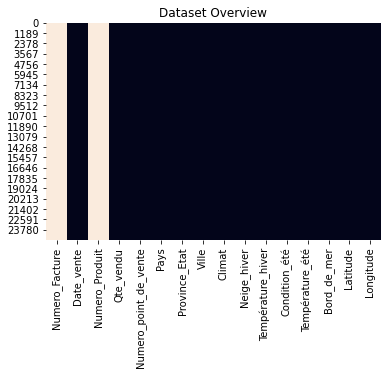

 Categerocial   Numeric   NaN 


In [42]:
dic_cols = {col:utils_recognize_type(df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [43]:
df2.isnull().sum()

Numero_Facture           0
Date_vente               0
Numero_Produit           0
Qte_vendu                0
Numero_point_de_vente    0
Pays                     0
Province_Etat            0
Ville                    0
Climat                   0
Neige_hiver              0
Température_hiver        0
Condition_été            0
Température_été          0
Bord_de_mer              0
Latitude                 0
Longitude                0
Utilisation              0
Joint_Etancheite         0
Type                     0
Style                    0
Fini                     0
Matiere_prem             0
Peinture                 0
dtype: int64

In [44]:
top_prod = df2.groupby("Numero_Produit").count()
top_prod = top_prod.sort_values(by=['Qte_vendu'], ascending=True)
top_prod = df2.groupby(['Numero_Produit','Qte_vendu']).sum()

In [45]:
top_prod.head(20)

Numero_Facture  Numero_point_de_vente     Latitude  \
Numero_Produit Qte_vendu                                                       
126626962      1.0        36668228178619              583921858  1329.557228   
               2.0        24445355615721              450180847   907.451864   
               3.0        42223638928943              791677856  1599.941130   
               4.0        41112729523982              878222325  1563.559139   
               5.0        46668133651127              900878631  1654.355267   
               6.0        32223110836810              606238342  1186.934128   
285143737      1.0        42223792666891              823529282  1540.701050   
               2.0        43334945127002              890508679  1620.460704   
               3.0        36667968583639              810803287  1427.254273   
               4.0        34445911093028              566171038  1263.738500   
               5.0        41112607874519              819654870  1508.520289   
               6.0        45557130438600              870620356  1666.672228   
327459185      1.0        42223736497345              861936797  1610.517753   
               2.0        32223424294700              667517240  1156.282300   
               3.0        47779710294599              953859612  1763.559476   
               4.0        42223709341356              882176356  1644.993556   
               5.0        33334573998650              665697181  1254.266395   
               6.0        38890271072489              685619595  1457.587202   
365625573      1.0        37779007596959              712926279  1327.913403   
               2.0        33334922436710              574567655  1234.379301   

                            Longitude  
Numero_Produit Qte_vendu               
126626962      1.0       -3185.954340  
               2.0       -2076.462242  
               3.0       -3500.207514  
               4.0       -3467.709397  
               5.0       -4202.936108  
               6.0       -2932.107402  
285143737      1.0       -3643.800902  
               2.0       -3691.757767  
               3.0       -3049.049850  
               4.0       -2917.742145  
               5.0       -3704.144977  
               6.0       -4055.164071  
327459185      1.0       -3481.984086  
               2.0       -2819.984674  
               3.0       -4149.251855  
               4.0       -3578.221743  
               5.0       -2801.719776  
               6.0       -3081.006890  
365625573      1.0       -3433.658412  
               2.0       -2789.471741

In [46]:
top_prod = df2.groupby("Numero_Produit").count()
top_prod = top_prod.sort_values(by=['Utilisation'], ascending=True)
top_prod = df2.groupby(['Numero_Produit','Utilisation']).sum()

In [47]:
top_prod.head(20)

,,Numero_Facture,Qte_vendu,Numero_point_de_vente,Latitude,Longitude
Numero_Produit,Utilisation,,,,,
126626962,interieur,223341196735202,723.0,4211119859,8241.798756,-19365.377004
285143737,interieur,243342355783679,770.0,4781287512,9027.347044,-21061.659711
327459185,exterieur,236675425499139,737.0,4716806781,8887.206682,-19912.169024
365625573,exterieur,221118668715033,711.0,4124232107,8283.276531,-18642.246094
920424979,interieur,234453372961696,708.0,4798840361,8866.093024,-19862.998487
942881804,exterieur,226674455604435,701.0,4403974104,8601.842271,-18974.325938
963002721,exterieur,236674367799546,758.0,4479935704,8864.069292,-19914.083057
1218756833,exterieur,260008463542210,818.0,5183741513,9845.739404,-21898.568469
1285311706,interieur,240008111730264,733.0,4435398311,8908.221003,-20563.672467


In [48]:
top_Ville = df2.groupby("Ville").count()
top_Ville = top_Ville.sort_values(by=['Utilisation'], ascending=True)
top_Ville = df2.groupby(['Ville','Utilisation']).sum()

In [49]:
top_Ville.head(20)

Numero_Facture  Numero_Produit  Qte_vendu  \
Ville       Utilisation                                                
Albuquerque exterieur    1352269479753798   5882026740249     4297.0   
            interieur    1291155991743042   5657032497789     4136.0   
El Paso     exterieur    1456718199976954   6310775156824     4542.0   
            interieur    1372270394201731   5895257280399     4356.0   
Gaspésie    exterieur    1504496880144846   6597909162617     4782.0   
            interieur    1317822633056730   5728828230995     4075.0   
Montréal    exterieur    1475607647965476   6438742001916     4659.0   
            interieur    1276710501134006   5650453195934     4002.0   
Québec      exterieur    1443382991671425   6432979608585     4613.0   
            interieur    1315601619547150   5844230002656     4042.0   
Santa Cruz  exterieur    1404493564671194   6101737692328     4476.0   
            interieur    1243377135389045   5391190591844     4003.0   
Vancouver   exterieur    1458939828195629   6360170768201     4626.0   
            interieur    1297823622248372   5841122243463     4121.0   

                         Numero_point_de_vente      Latitude      Longitude  
Ville       Utilisation                                                      
Albuquerque exterieur              20220674060  42724.934222 -129767.713277  
            interieur              19306839160  40794.062092 -123903.108322  
El Paso     exterieur              19463199081  41653.803873 -139570.309383  
            interieur              18334897685  39239.090605 -131479.276955  
Gaspésie    exterieur              28465950338  66115.955400  -87308.357200  
            interieur              24933986042  57912.498600  -76475.414800  
Montréal    exterieur              33205663920  60426.242859  -97697.315968  
            interieur              28729900485  52281.440546  -84528.777144  
Québec      exterieur              16058525079  60820.003566  -92530.380990  
            interieur              14636869664  55435.630656  -84338.699840  
Santa Cruz  exterieur              14293122400  46735.283888 -154246.921088  
            interieur              12653484150  41374.036923 -136552.456248  
Vancouver   exterieur              64172307784  59923.649995 -161054.531249  
            interieur              57085495424  53306.034421 -143268.615765

In [50]:
top_Ville  = df2.groupby("Ville").count()
top_Ville  = top_Ville.sort_values(by=['Climat','Température_hiver','Numero_Facture','Numero_point_de_vente','Bord_de_mer'], ascending=True)
top_Ville  = df2.groupby(['Ville','Climat','Température_hiver','Numero_Facture','Numero_point_de_vente','Bord_de_mer']).sum()

In [51]:
top_Ville .head(10)

Numero_Produit  \
Ville       Climat Température_hiver Numero_Facture Numero_point_de_vente Bord_de_mer                   
Albuquerque Aride  Doux              1111100070714  16615180              Non              6972019101   
                                     1111100091702  16615180              Non              2620191588   
                                     1111100109162  16615180              Non              4603470390   
                                     1111100172548  16615180              Non              8523384669   
                                     1111100185890  16615180              Non              1218756833   
                                     1111100328860  16615180              Non              5360257996   
                                     1111100354548  16615180              Non               126626962   
                                     1111100407992  16615180              Non              8523384669   
                                     1111100435544  16615180              Non              1859573363   
                                     1111100625006  16615180              Non              6851969022   

                                                                                       Qte_vendu  \
Ville       Climat Température_hiver Numero_Facture Numero_point_de_vente Bord_de_mer              
Albuquerque Aride  Doux              1111100070714  16615180              Non                1.0   
                                     1111100091702  16615180              Non                3.0   
                                     1111100109162  16615180              Non                2.0   
                                     1111100172548  16615180              Non                6.0   
                                     1111100185890  16615180              Non                4.0   
                                     1111100328860  16615180              Non                5.0   
                                     1111100354548  16615180              Non                6.0   
                                     1111100407992  16615180              Non                5.0   
                                     1111100435544  16615180              Non                2.0   
                                     1111100625006  16615180              Non                3.0   

                                                                                        Latitude  \
Ville       Climat Température_hiver Numero_Facture Numero_point_de_vente Bord_de_mer              
Albuquerque Aride  Doux              1111100070714  16615180              Non          35.106766   
                                     1111100091702  16615180              Non          35.106766   
                                     1111100109162  16615180              Non          35.106766   
                                     1111100172548  16615180              Non          35.106766   
                                     1111100185890  16615180              Non          35.106766   
                                     1111100328860  16615180              Non          35.106766   
                                     1111100354548  16615180              Non          35.106766   
                                     1111100407992  16615180              Non          35.106766   
                                     1111100435544  16615180              Non          35.106766   
                                     1111100625006  16615180              Non          35.106766   

                                                                                        Longitude  
Ville       Climat Température_hiver Numero_Facture Numero_point_de_vente Bord_de_mer              
Albuquerque Aride  Doux              1111100070714  16615180              Non         -106.629181  
                                     1111100091702  16615180              Non         -106.629181  
                        

In [52]:
top_Style = df2.groupby("Style").count()
top_Style = top_Style.sort_values(by=['Pays','Province_Etat','Ville','Numero_Produit','Type'], ascending=True)
top_Style = df2.groupby(['Style','Pays','Province_Etat','Ville','Numero_Produit','Type']).sum()

In [53]:
top_Style .head(10)

Numero_Facture  \
Style        Pays   Province_Etat       Ville     Numero_Produit Type                               
Contemporain Canada Colombie-Britanique Vancouver 126626962      plafond_suspendu  28890034672810   
                                                  920424979      plafond_encastre  41112515205604   
                                                  942881804      plafond_surface   31111834683206   
                                                  1422080632     plafond_surface   31112217667969   
                                                  2499813567     mural_encastre    40001603609404   
                                                  2819717964     plafond_encastre  31112098792170   
                                                  3132714456     plafond_suspendu  25556049254513   
                                                  3653498644     plafond_suspendu  31112349568384   
                                                  3857377776     plafond_surface   36668016804788   
                                                  4047585339     mural_encastre    26667695731004   

                                                                                   Qte_vendu  \
Style        Pays   Province_Etat       Ville     Numero_Produit Type                          
Contemporain Canada Colombie-Britanique Vancouver 126626962      plafond_suspendu      103.0   
                                                  920424979      plafond_encastre      122.0   
                                                  942881804      plafond_surface        95.0   
                                                  1422080632     plafond_surface        96.0   
                                                  2499813567     mural_encastre        130.0   
                                                  2819717964     plafond_encastre      101.0   
                                                  3132714456     plafond_suspendu       75.0   
                                                  3653498644     plafond_suspendu      101.0   
                                                  3857377776     plafond_surface       106.0   
                                                  4047585339     mural_encastre         94.0   

                                                                                   Numero_point_de_vente  \
Style        Pays   Province_Etat       Ville     Numero_Produit Type                                      
Contemporain Canada Colombie-Britanique Vancouver 126626962      plafond_suspendu             1270738768   
                                                  920424979      plafond_encastre             1808359016   
                                                  942881804      plafond_surface              1368487904   
                                                  1422080632     plafond_surface              1368487904   
                                                  2499813567     mural_encastre               1759484448   
                                                  2819717964     plafond_encastre             1368487904   
                                                  3132714456     plafond_suspendu             1124115064   
                                                  3653498644     plafond_suspendu             1368487904   
                                                  3857377776     plafond_surface              1612860744   
                                                  4047585339     mural_encastre               1172989632   

                                                                                      Latitude  \
Style        Pays   Province_Etat       Ville     Numero_Produit Type                            
Contemporain Canada Colombie-Britanique Vancouver 126626962      plafond_suspendu  1186.606931   
                                                  920424979      plafond_encastre  1688.632940   
                            

In [54]:
top_Peinture = df2.groupby("Peinture").count()
top_Peinture = top_Peinture.sort_values(by=['Numero_Produit','Numero_Facture','Qte_vendu','Numero_point_de_vente','Ville'], ascending=True)
top_Peinture = df2.groupby(['Peinture','Numero_Produit','Numero_Facture','Qte_vendu','Numero_point_de_vente','Ville']).sum()

In [55]:
top_Peinture.head(20)

Latitude  \
Peinture Numero_Produit Numero_Facture Qte_vendu Numero_point_de_vente Ville                    
Aucune   126626962      1111100354548  6.0       16615180              Albuquerque  35.106766   
                        1111100578814  3.0       21023597              Gaspésie     48.830100   
                        1111100614055  2.0       12362221              Québec       46.820634   
                        1111100701502  2.0       25004265              Montréal     45.501689   
                        1111100873094  6.0       14846071              El Paso      31.772543   
                        1111101073721  6.0       25004265              Montréal     45.501689   
                        1111102852004  5.0       16615180              Albuquerque  35.106766   
                        1111103303383  5.0       25004265              Montréal     45.501689   
                        1111104516232  1.0       14846071              El Paso      31.772543   
                        1111104521144  6.0       12362221              Québec       46.820634   
                        1111104845592  6.0       11307850              Santa Cruz   36.974117   
                        1111106627097  2.0       14846071              El Paso      31.772543   
                        1111107098070  2.0       11307850              Santa Cruz   36.974117   
                        1111107269555  1.0       12362221              Québec       46.820634   
                        1111107464394  3.0       12362221              Québec       46.820634   
                        1111107468880  5.0       48874568              Vancouver    45.638728   
                        1111109029676  6.0       11307850              Santa Cruz   36.974117   
                        1111110369785  1.0       21023597              Gaspésie     48.830100   
                        1111110386423  5.0       21023597              Gaspésie     48.830100   
                        1111111070680  5.0       25004265              Montréal     45.501689   

                                                                                     Longitude  
Peinture Numero_Produit Numero_Facture Qte_vendu Numero_point_de_vente Ville                    
Aucune   126626962      1111100354548  6.0       16615180              Albuquerque -106.629181  
                        1111100578814  3.0       21023597              Gaspésie     -64.481800  
                        1111100614055  2.0       12362221              Québec       -71.232010  
                        1111100701502  2.0       25004265              Montréal     -73.567256  
                        1111100873094  6.0       14846071              El Paso     -106.460953  
                        1111101073721  6.0       25004265              Montréal     -73.567256  
                        1111102852004  5.0       16615180              Albuquerque -106.629181  
                        1111103303383  5.0       25004265              Montréal     -73.567256  
                        1111104516232  1.0       14846071              El Paso     -106.460953  
                        1111104521144  6.0       12362221              Québec       -71.232010  
                        1111104845592  6.0       11307850              Santa Cruz  -122.030792  
                        1111106627097  2.0       14846071              El Paso     -106.460953  
                        1111107098070  2.0       11307850              Santa Cruz  -122.030792  
                        1111107269555  1.0       12362221              Québec       -71.232010  
                        1111107464394  3.0       12362221              Québec       -71.232010  
                        1111107468880  5.0       48874568              Vancouver   -122.661486  
                        1111109029676  6.0       11307850              Santa Cruz  -122.030792  
                        1111110369785  1.0       21023597              Gaspésie     -64.481800  
          

In [56]:
top_Joint_Etancheite = df2.groupby("Joint_Etancheite").count()
top_Joint_Etancheite = top_Joint_Etancheite.sort_values(by=['Numero_Facture','Numero_Produit','Climat','Province_Etat','Ville','Pays','Numero_point_de_vente','Type','Peinture','Matiere_prem'],ascending=True)
top_Joint_Etancheite = df2.groupby(['Joint_Etancheite','Numero_Facture','Numero_Produit','Climat','Province_Etat','Ville','Pays','Numero_point_de_vente','Type','Peinture','Matiere_prem']).sum()

In [57]:
top_Joint_Etancheite.head(10)

Qte_vendu  \
Joint_Etancheite Numero_Facture Numero_Produit Climat             Province_Etat       Ville       Pays          Numero_point_de_vente Type             Peinture            Matiere_prem              
Non              1111100053168  5591775122     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_encastre Aucune              Stainless           3.0   
                 1111100055674  4676850198     Continental Humide Québec              Québec      Canada        12362221              plafond_surface  Aucune              Stainless           2.0   
                 1111100063440  4420948058     Désertique         Texas               El Paso     United States 14846071              plafond_encastre Aucune              Aluminium           5.0   
                 1111100070714  6972019101     Aride              New-Mexico          Albuquerque United States 16615180              plafond_surface  Aucune              Plastique           1.0   
                 1111100087552  5686293098     Océanique          Colombie-Britanique Vancouver   Canada        48874568              plafond_encastre Peinture_poudre     Stainless           6.0   
                 1111100092679  3724533342     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_suspendu Aucune              Aluminium           3.0   
                 1111100101982  5686293098     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_encastre Peinture_poudre     Stainless           2.0   
                 1111100102507  7665695138     Continental Humide Québec              Québec      Canada        12362221              plafond_suspendu Peinture_poudre     Aluminium           6.0   
                 1111100103092  8090208108     Continental Humide Québec              Montréal    Canada        25004265              plafond_suspendu Peinture_poudre_ext Stainless           6.0   
                 1111100137363  6894968655     Continental Humide Québec              Gaspésie    Canada        21023597              mural_surface    Aucune              Plastique           5.0   

                                                                                                                                                                                          Latitude  \
Joint_Etancheite Numero_Facture Numero_Produit Climat             Province_Etat       Ville       Pays          Numero_point_de_vente Type             Peinture            Matiere_prem              
Non              1111100053168  5591775122     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_encastre Aucune              Stainless     48.830100   
                 1111100055674  4676850198     Continental Humide Québec              Québec      Canada        12362221              plafond_surface  Aucune              Stainless     46.820634   
                 1111100063440  4420948058     Désertique         Texas               El Paso     United States 14846071              plafond_encastre Aucune              Aluminium     31.772543   
                 1111100070714  6972019101     Aride              New-Mexico          Albuquerque United States 16615180              plafond_surface  Aucune              Plastique     35.106766   
                 1111100087552  5686293098     Océanique          Colombie-Britanique Vancouver   Canada        48874568              plafond_encastre Peinture_poudre     Stainless     45.638728   
                 1111100092679  3724533342     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_suspendu Aucune              Aluminium     48.830100   
                 1111100101982  5686293098     Continental Humide Québec              Gaspésie    Canada        21023597              plafond_encastre Peinture_poudre     Stainless     48.830100   
                 111110010

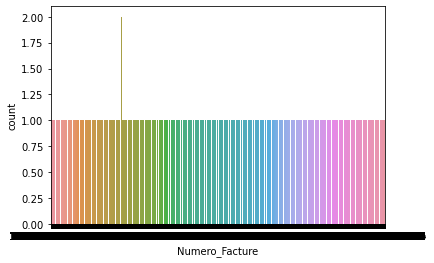

In [60]:
sns.countplot(x = 'Numero_Facture',data = df2)

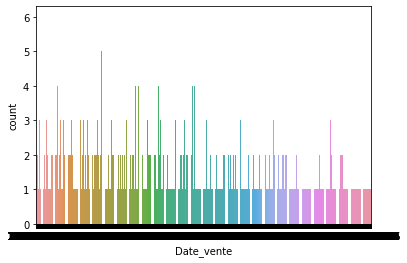

In [62]:
sns.countplot(x = 'Date_vente',data = df2)

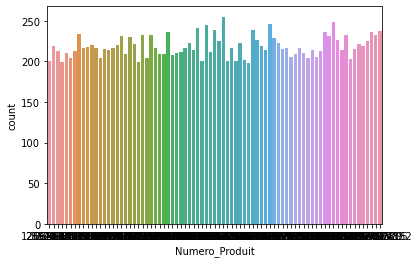

In [64]:
sns.countplot(x = 'Numero_Produit',data = df2)

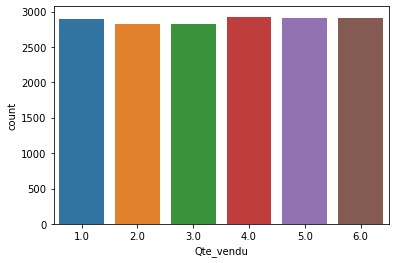

In [65]:
sns.countplot(x = 'Qte_vendu',data = df2)

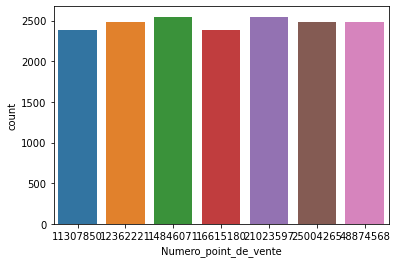

In [66]:
sns.countplot(x = 'Numero_point_de_vente',data = df2)

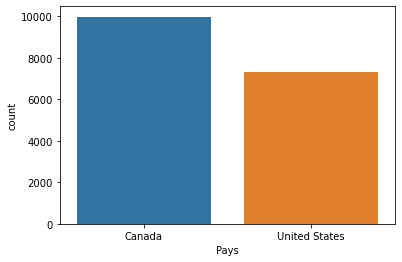

In [67]:
sns.countplot(x = 'Pays',data = df2)

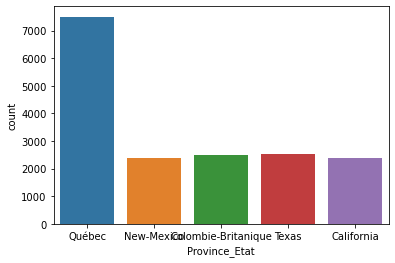

In [68]:
sns.countplot(x = 'Province_Etat',data = df2)

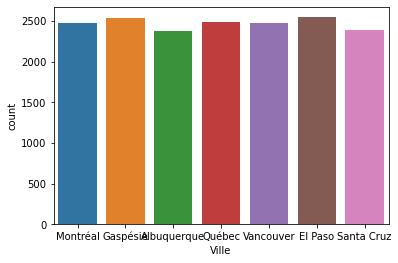

In [69]:
sns.countplot(x = 'Ville',data = df2)

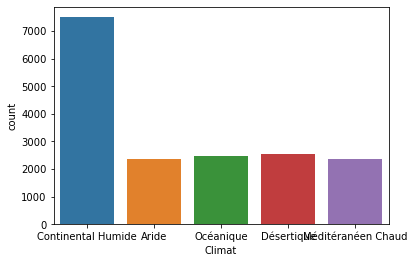

In [70]:
sns.countplot(x = 'Climat',data = df2)

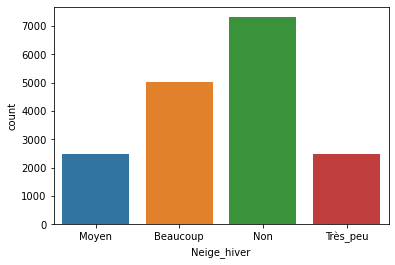

In [71]:
sns.countplot(x = 'Neige_hiver',data = df2)

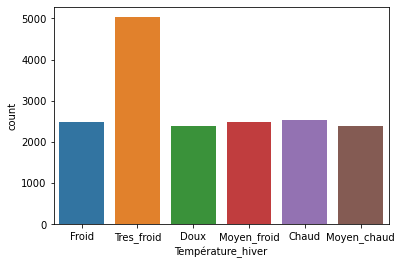

In [72]:
sns.countplot(x = 'Température_hiver',data = df2)

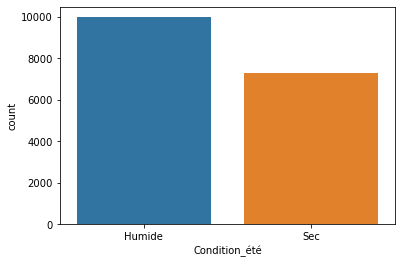

In [73]:
sns.countplot(x = 'Condition_été',data = df2)

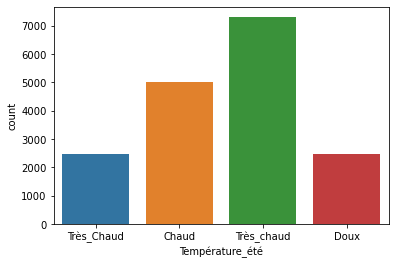

In [74]:
sns.countplot(x = 'Température_été',data = df2)

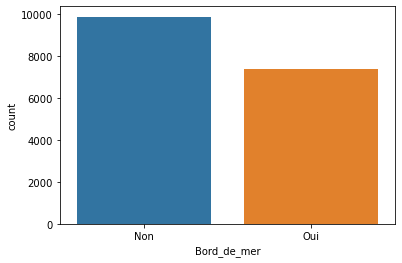

In [75]:
sns.countplot(x = 'Bord_de_mer',data = df2)

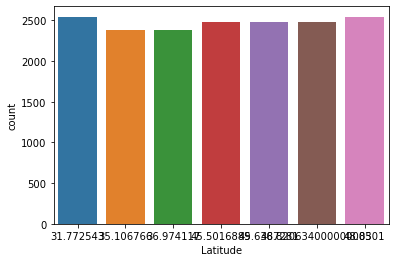

In [76]:
sns.countplot(x = 'Latitude',data = df2)

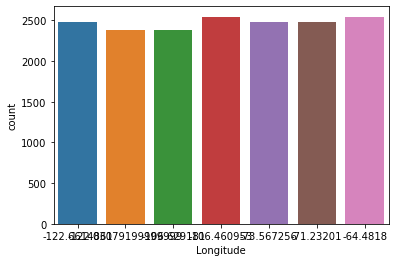

In [77]:
sns.countplot(x = 'Longitude',data = df2)

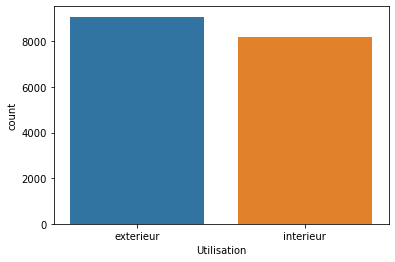

In [78]:
sns.countplot(x = 'Utilisation',data = df2)

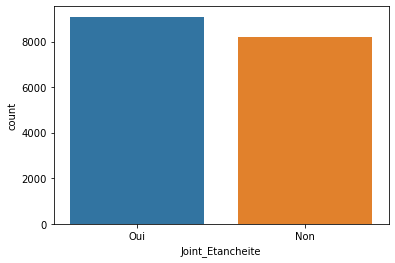

In [79]:
sns.countplot(x = 'Joint_Etancheite',data = df2)

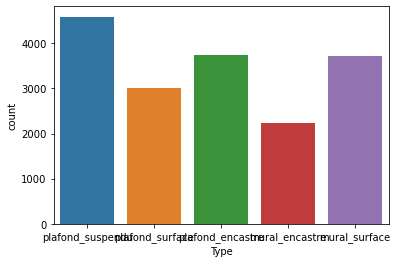

In [80]:
sns.countplot(x = 'Type',data = df2)

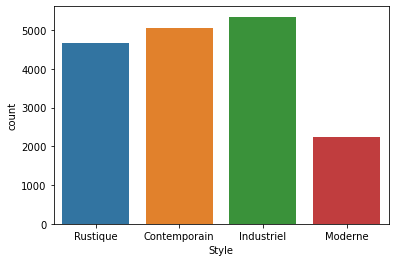

In [81]:
sns.countplot(x = 'Style',data = df2)

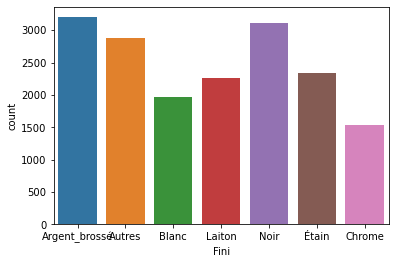

In [82]:
sns.countplot(x = 'Fini',data = df2)

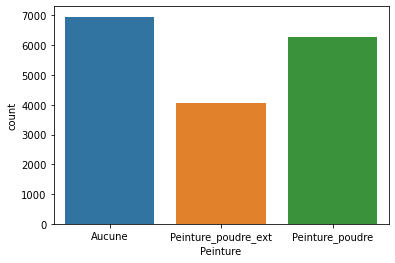

In [59]:
sns.countplot(x = 'Peinture',data = df2)

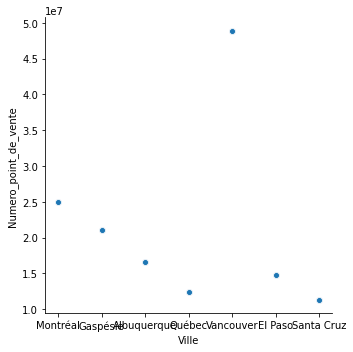

In [117]:
sns.relplot(x = 'Ville',y = 'Numero_point_de_vente',data = df2)

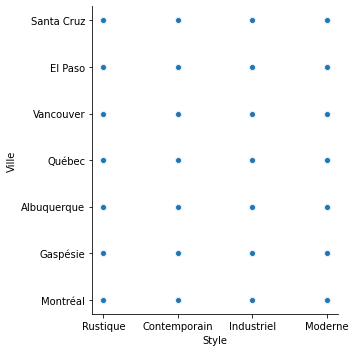

In [94]:
sns.relplot(x = 'Style',y = 'Ville',data = df2)

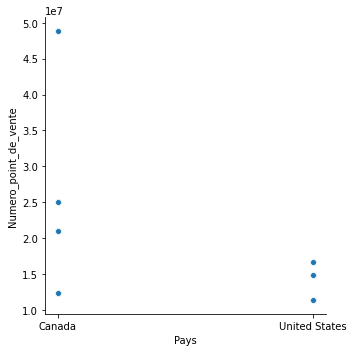

In [126]:
sns.relplot(x = 'Pays',y = 'Numero_point_de_vente',data = df2)

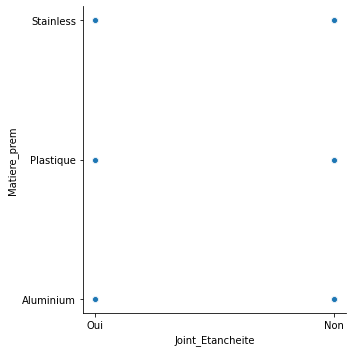

In [114]:
sns.relplot(x = 'Joint_Etancheite',y = 'Matiere_prem',data = df2)

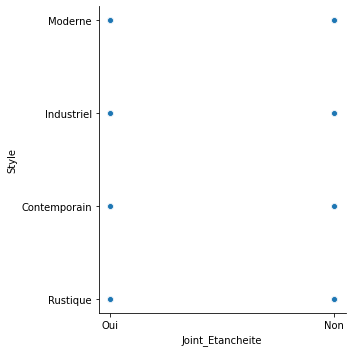

In [115]:
sns.relplot(x = 'Joint_Etancheite',y = 'Style',data = df2)

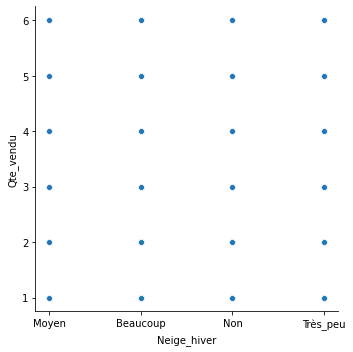

In [119]:
sns.relplot(x = 'Neige_hiver',y = 'Qte_vendu',data = df2)

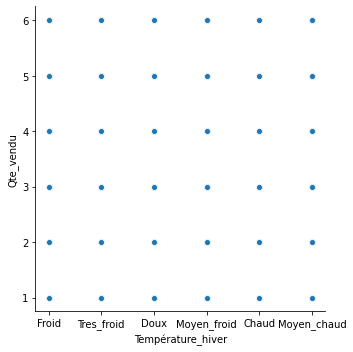

In [120]:
sns.relplot(x = 'Température_hiver',y = 'Qte_vendu',data = df2)

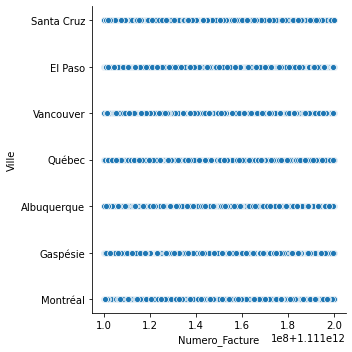

In [122]:
sns.relplot(x = 'Numero_Facture',y = 'Ville',data = df2)

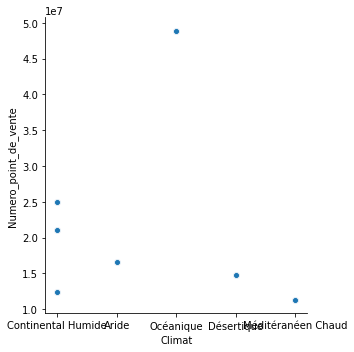

In [125]:
sns.relplot(x = 'Climat',y = 'Numero_point_de_vente',data = df2)